In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import run_ML_classification as ml

In [4]:
from joblib import dump, load
stack = load('10CC_ML_classifier.joblib') 

# ponlies

In [5]:
dpath = '../results'
ponly_df = pd.read_csv(os.path.join(dpath,'monte_ponly_clean_df.csv.gz',))


In [6]:
ponly_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [7]:
ponly_df[['id', 'media', 'which', 'model', 'hash']] =     ponly_df.run_id.str.rsplit('_', n=4, expand=True)


In [8]:
ponly_df_lowN = ponly_df.loc[ponly_df.media.isin(['lowN'])]
ponly_df_lowN

,Bp,Np,Cp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,Bp[C],ref_Bp[N],ref_Bp[C],run_id,idx,id,media,which,model,hash
0,8.928571e-01,0.000000,0.000000e+00,3.000000,0.000000,100.000000,19.875000,0.000000,2241.552301,2.000000e-01,...,5.915179e+00,0.892857,5.915179e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
1,9.015690e-01,0.342126,3.463992e-01,3.036171,0.075810,99.537181,20.111342,0.419613,2240.544073,2.000000e-01,...,5.972895e+00,1.243695,6.319294e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
2,9.981395e-01,0.447436,4.459904e-01,3.082132,0.169170,99.195980,20.371718,0.881898,2239.268507,2.000000e-01,...,6.612674e+00,1.445575,7.058665e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
3,1.061663e+00,0.485570,4.821232e-01,3.109936,0.224939,99.010750,20.524632,1.153389,2238.549040,2.000000e-01,...,7.033515e+00,1.547233,7.515638e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
4,1.184076e+00,0.547293,5.421534e-01,3.163049,0.330451,98.667988,20.812794,1.665006,2237.263908,2.000000e-01,...,7.844504e+00,1.731369,8.386657e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582307,2.244595e-11,0.000028,7.066954e-33,3.215614,0.252082,100.425134,23.566105,0.922776,2241.552317,7.203458e-13,...,1.487045e-10,0.000028,1.487045e-10,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071
6582308,8.460400e-12,0.000019,7.611836e-33,3.184249,0.252083,100.456506,23.566105,0.922776,2241.552311,2.373686e-13,...,5.605015e-11,0.000019,5.605015e-11,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071
6582309,4.709627e-12,0.000015,-1.096020e-33,3.165564,0.252084,100.475194,23.566105,0.922776,2241.552308,1.224276e-13,...,3.120128e-11,0.000015,3.120128e-11,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071
6582310,2.597886e-12,0.000012,2.413000e-33,3.146700,0.252085,100.494061,23.566105,0.922776,2241.552306,6.271628e-14,...,1.721100e-11,0.000012,1.721100e-11,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071


In [9]:
X_ponly_lowN, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(
    ponly_df_lowN, groupby_cols=['run_id', 'idx', 'model'])


In [10]:
X_ponly, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(
    ponly_df, groupby_cols=['run_id', 'idx', 'model', 'media'])


In [11]:
X_ponly_lowN

,,,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,mean_30-60days_Nbiomass,std_30-60days_Cbiomass,median_30-60days_Cbiomass,mean_30-60days_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,idx,model,,,,,,,,,,,,,,,,,,,,,
monte_ponly_EXOENZYME_100_monte__0_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monte_ponly_EXOENZYME_100_monte__10_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,12.830556,76.937915,13.695833,461.164272,3.642478,5.083520,6.218467,31.373550,42.254994,52.028402,...,0.572687,0.547289,0.529819,0.524223,0.519252,0.510173,0.501508,0.499005,0.496557,0.491493
monte_ponly_EXOENZYME_100_monte__11_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__11_EXOENZYME,EXOENZYME,69.802083,33.612576,72.775000,186.546410,4.735901,8.996902,10.200794,25.113502,47.712403,54.095990,...,3.250398,2.951306,2.688571,2.589953,2.494758,2.298025,2.074382,2.001439,1.925796,1.753964
monte_ponly_EXOENZYME_100_monte__12_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__12_EXOENZYME,EXOENZYME,44.759028,80.957543,46.794444,568.209472,19.657375,58.102238,53.946108,162.087152,419.069641,380.531133,...,3.726158,3.656984,3.595477,3.572124,3.549404,3.501760,3.446091,3.427480,3.407891,3.362074
monte_ponly_EXOENZYME_100_monte__13_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__13_EXOENZYME,EXOENZYME,26.747222,57.998203,27.852778,303.790640,11.200333,12.245175,15.740444,83.944005,92.834733,118.311530,...,0.741586,0.676306,0.630331,0.615451,0.602195,0.577925,0.554815,0.548179,0.541717,0.528489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ponly_ROS_9_monte__96_lowN_ponly_ROS_h-2025029465965034071,monte_ponly_ROS_9_monte__96_ROS,ROS,91.000000,13.655531,91.000000,68.018363,0.283399,1.000000,1.130259,2.509347,3.239714,3.999248,...,1.558926,1.756150,1.932423,1.999630,2.065188,2.203276,2.365833,2.420506,2.478247,2.614145
monte_ponly_ROS_9_monte__97_lowN_ponly_ROS_h-2025029465965034071,monte_ponly_ROS_9_monte__97_ROS,ROS,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,1.000000,0.156006,4.082168,4.095096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monte_ponly_ROS_9_monte__98_lowN_ponly_ROS_h-2025029465965034071,monte_ponly_ROS_9_monte__98_ROS,ROS,19.711111,70.649814,20.778472,517.241323,6.797701,7.708972,9.778451,59.796147,67.258103,85.460505,...,0.218335,0.129096,0.061979,0.039270,0.018544,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
df_predicted_classes = ml.ML_model_predict_proba(stack, X_ponly_lowN)

In [13]:
df_predicted_classes.to_csv('monte_ponly_predicted_classes.csv.gz', index=False)

In [14]:
df_ponly_maxday  = X_ponly_lowN[forest_features].reset_index()

In [15]:
df_ponly_maxday.to_csv('features_monte_ponly_clean.csv.gz', index=False)

In [16]:
df_ponly_maxday  = X_ponly[forest_features].reset_index()

In [17]:
df_ponly_maxday.to_csv('features_monte_ponly_clean.csv.gz', index=False)

In [18]:
df_ponly_maxday

,run_id,idx,model,media,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,...,std_60-80days_Nbiomass,median_60-80days_Nbiomass,mean_60-80days_Nbiomass,std_60-80days_Cbiomass,median_60-80days_Cbiomass,mean_60-80days_Cbiomass,last_dayN,last_dayC,D90_dayN,D90_dayC
0,monte_ponly_EXOENZYME_100_monte__0_lowN_ponly_...,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,lowN,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.747222,0.000000,0.000000
1,monte_ponly_EXOENZYME_100_monte__0_pro99_ponly...,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,pro99,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.122222,0.000000,0.000000
2,monte_ponly_EXOENZYME_100_monte__10_lowN_ponly...,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,lowN,12.830556,76.937915,13.695833,461.164272,3.642478,5.083520,...,0.127084,1.852055,1.859919,1.094138,14.414105,14.482404,62.892361,91.000000,24.958333,31.063194
3,monte_ponly_EXOENZYME_100_monte__10_pro99_ponl...,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,pro99,20.008333,546.590868,24.114583,2303.364498,52.478363,63.709480,...,2.408363,16.803635,17.197330,20.753485,132.909353,136.302872,85.796528,85.796528,25.947917,31.780556
4,monte_ponly_EXOENZYME_100_monte__11_lowN_ponly...,monte_ponly_EXOENZYME_100_monte__11_EXOENZYME,EXOENZYME,lowN,69.802083,33.612576,72.775000,186.546410,4.735901,8.996902,...,5.887443,27.350074,25.863366,26.084685,155.049991,153.337429,91.000000,91.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99727,monte_ponly_ROS_9_monte__98_pro99_ponly_ROS_h-...,monte_ponly_ROS_9_monte__98_ROS,ROS,pro99,27.083333,516.368482,29.145139,2265.100380,102.929504,105.397567,...,4.675937,14.020885,14.782395,41.121025,119.230793,125.927836,85.796528,85.796528,24.032639,32.881944
99728,monte_ponly_ROS_9_monte__99_lowN_ponly_ROS_h-2...,monte_ponly_ROS_9_monte__99_ROS,ROS,lowN,91.000000,3.369212,91.000000,31.696800,0.165256,1.010269,...,0.292154,1.959566,2.024832,2.748515,18.435186,19.049197,91.000000,91.000000,0.000000,0.000000
99729,monte_ponly_ROS_9_monte__99_pro99_ponly_ROS_h-...,monte_ponly_ROS_9_monte__99_ROS,ROS,pro99,85.796528,2.970939,85.796528,27.949135,0.169172,1.000929,...,0.272997,1.884703,1.903371,2.568219,17.730396,17.906009,85.796528,85.796528,0.000000,0.000000
99730,monte_ponly_ROS_9_monte__9_lowN_ponly_ROS_h-20...,monte_ponly_ROS_9_monte__9_ROS,ROS,lowN,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.754167,0.000000,0.000000


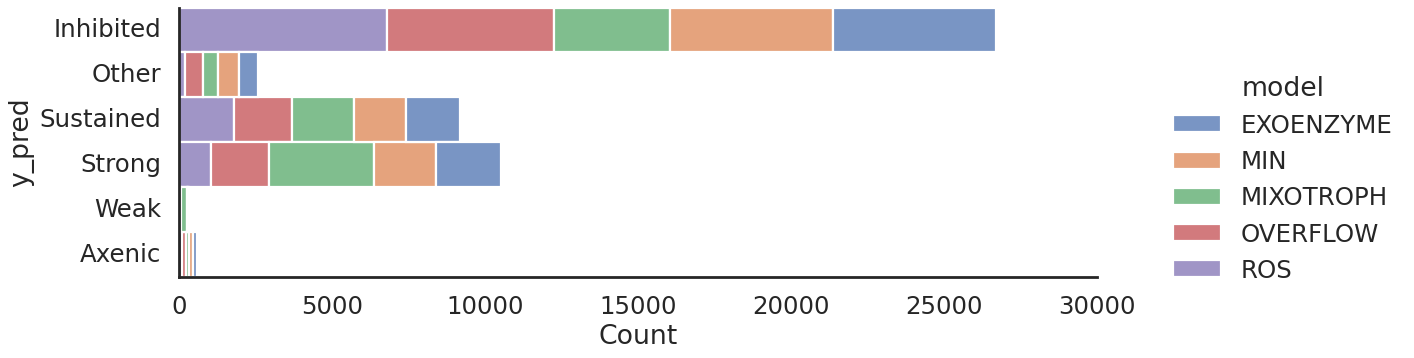

In [19]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
# g.set(xscale='log')

# classify simulations

In [20]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte_het_clean_df.csv.gz',))

# sim_df = pd.concat([
#     sim_df1,
#     sim_df2,
#     sim_df3,
#     sim_df4,
#     sim_df5,
#     sim_df6,
#     sim_df7,
# ])

In [21]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [22]:
X_sim, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(sim_df, groupby_cols=['run_id'])

In [23]:
df_predicted_classes = ml.ML_model_predict_proba(stack, X_sim)

In [24]:
df_predicted_classes

,run_id,y_pred,max_prob
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219
...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016


In [25]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [26]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.97479897, 0.90278431, 0.98615709, ..., 0.99001587, 0.99001614,
       0.99022911])

In [27]:
df_predicted_prob = pd.DataFrame(y_sim_pred_prop, columns=stack.classes_)
df_predicted_prob['run_id'] =  X_sim.index
df_predicted_prob['y_pred'] =  y_sim_pred
df_predicted_prob['max_prob'] =  max_sim_prob
df_predicted_prob


,Axenic,Inhibited,Other,Strong,Sustained,Weak,run_id,y_pred,max_prob
0,0.003487,0.004346,0.009584,0.002713,0.974799,0.005072,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799
1,0.050194,0.011149,0.023930,0.005112,0.006830,0.902784,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784
2,0.986157,0.002125,0.007520,0.000963,0.001379,0.001856,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157
3,0.986658,0.002149,0.007135,0.000941,0.001277,0.001841,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658
4,0.978219,0.002945,0.011415,0.001539,0.002450,0.003432,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219
...,...,...,...,...,...,...,...,...,...
49344,0.002267,0.002547,0.004793,0.001179,0.001570,0.987644,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644
49345,0.001625,0.002103,0.003976,0.000988,0.001292,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016
49346,0.001625,0.002103,0.003976,0.000988,0.001292,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016
49347,0.001625,0.002103,0.003976,0.000988,0.001292,0.990016,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016


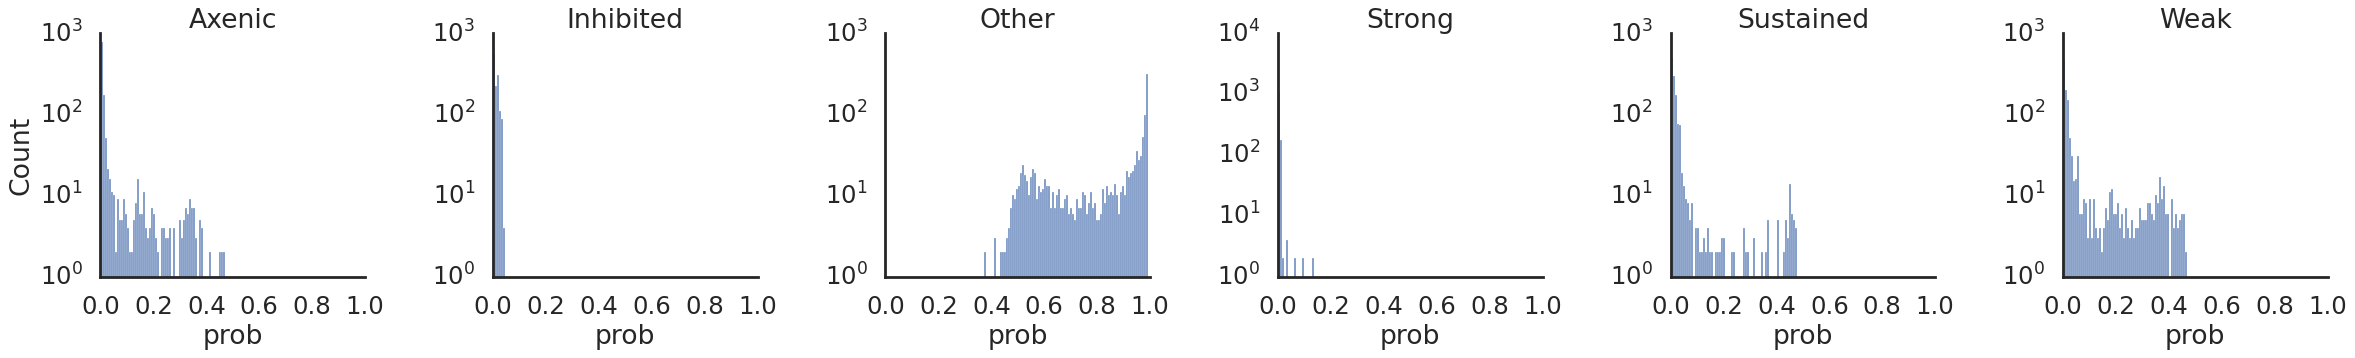

In [28]:
mdf_predicted_prob = df_predicted_prob.melt(
    id_vars=['run_id','y_pred', 'max_prob'], 
    value_vars=stack.classes_, 
    value_name='prob', var_name='Group')
g = sns.displot(
    data=mdf_predicted_prob.loc[mdf_predicted_prob.y_pred.isin(['Other'])], # & mdf_predicted_prob.max_prob.le(0.5)],
    x='prob', 
    col='Group', #col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [29]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [30]:
df_predicted_classes.to_csv('monte_het_predicted_classes.csv.gz', index=False)

In [31]:
df_sim_maxday  = X_sim[forest_features].reset_index()

In [32]:
df_sim_maxday.to_csv('features_monte_het_clean.csv.gz', index=False)

In [33]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644,monte_ROS_9_monte_vpro_93_82_ROS_C1_64,lowN,all,ROS,h-8660846992299669535
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_59,lowN,all,ROS,h-8660846992299669535
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_66,lowN,all,ROS,h-8660846992299669535
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016,monte_ROS_9_monte_vpro_97_23_ROS_C1_3,lowN,all,ROS,h-8660846992299669535


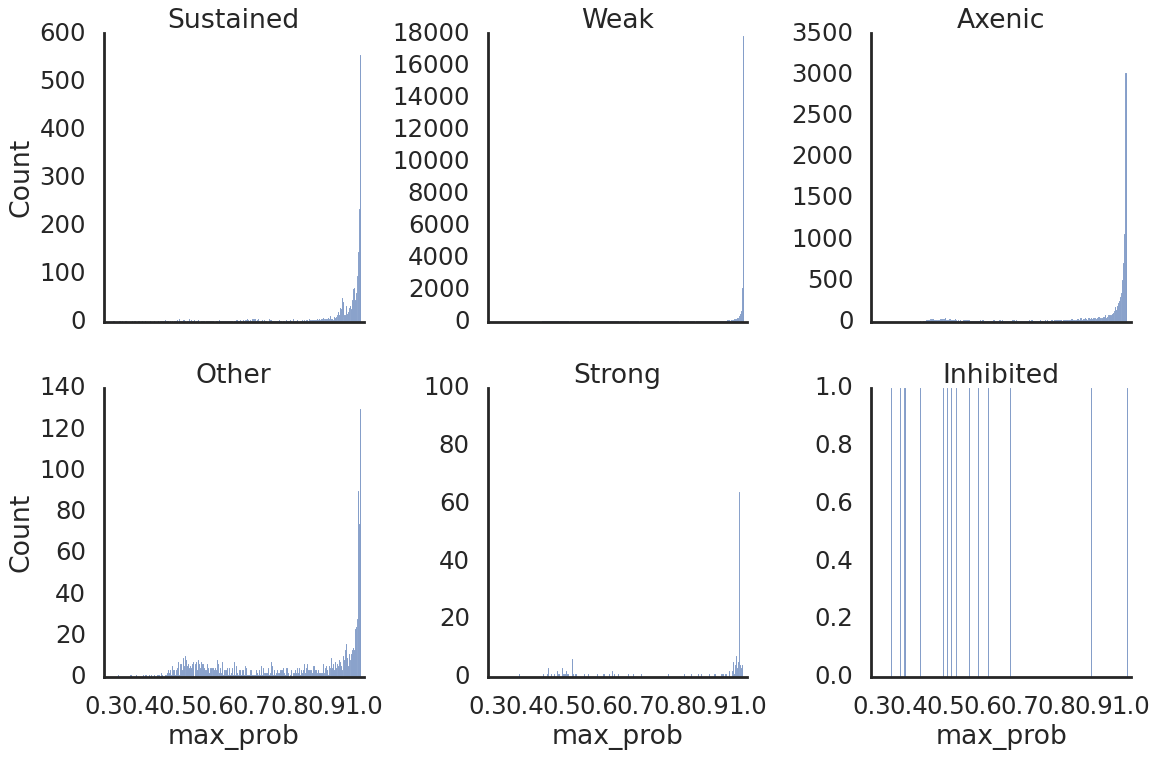

In [34]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

In [35]:
df_predicted_classes.y_pred.value_counts()

Weak         29575
Axenic       15791
Sustained     2406
Other         1292
Strong         267
Inhibited       18
Name: y_pred, dtype: int64

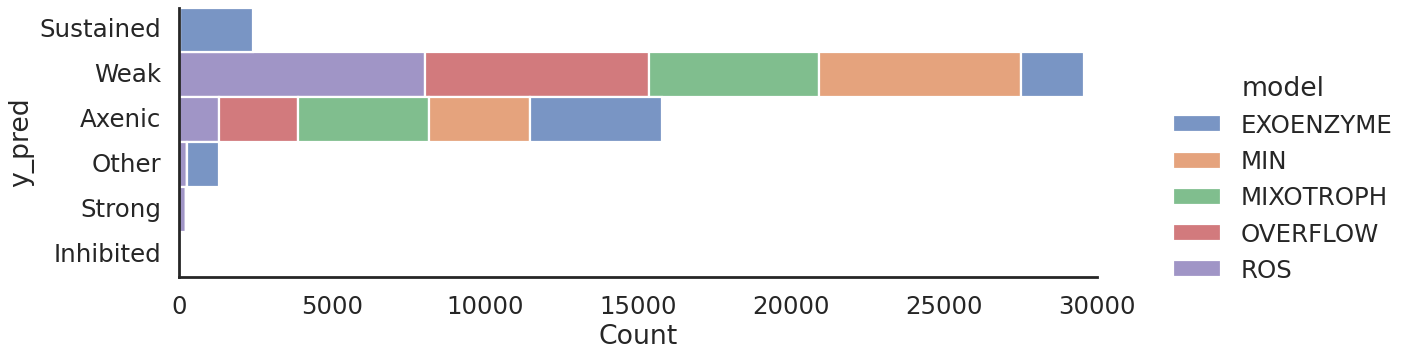

In [36]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
# g.set(xscale='log')

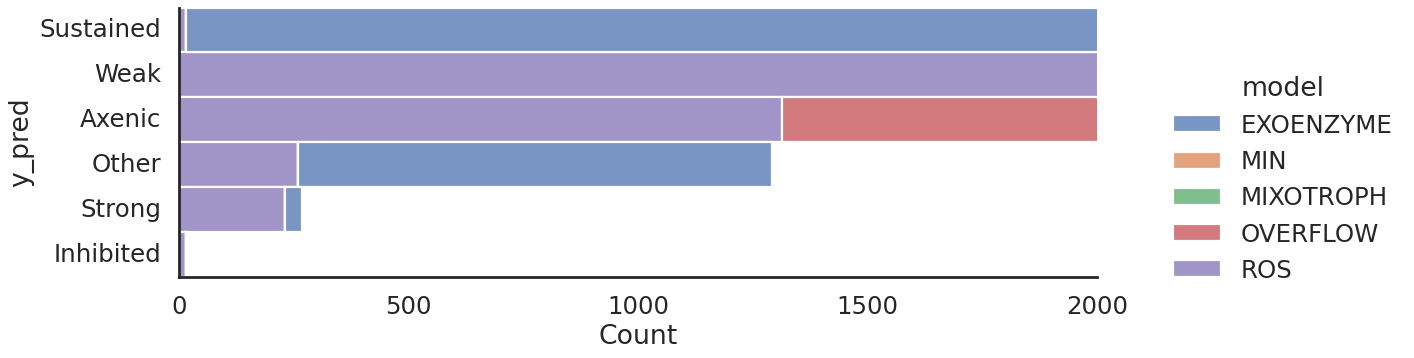

In [37]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
g.set(xlim=(0,2000))

In [38]:
sample_ids = df_predicted_classes.groupby(['model','y_pred']).run_id.sample(50, replace=True)

In [39]:
sample_df = sim_df.loc[sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,Unnamed: 0,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,...,Bhtotal[N],Bhtotal[C],run_id,y_pred,max_prob,idx,media,which,model,hash
0,21386,0.892857,0.000000,0.000000,28.571429,0.000000,0.000000e+00,3.000000,0.000000,100.000000,...,28.571429,142.857143,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,Axenic,0.986494,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
1,21387,1.347406,0.355619,2.992496,26.390768,7.884961,-2.161060e-20,0.163394,1.096496,95.225642,...,34.275729,131.953838,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,Axenic,0.986494,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
2,21388,2.494126,0.670237,5.574305,21.683343,11.234175,-2.651579e-21,0.955489,2.243824,93.183090,...,32.917518,108.416716,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,Axenic,0.986494,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
3,21389,3.483732,0.937661,7.780725,19.757960,12.451031,5.455380e-21,1.513960,2.883480,91.436462,...,32.208990,98.789800,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,Axenic,0.986494,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
4,21390,6.214709,1.675360,13.878704,17.480916,13.539328,-1.096743e-20,2.853598,4.069732,86.630643,...,31.020244,87.404581,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,Axenic,0.986494,monte_MIXOTROPH_56_monte_vpro_93_73_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54977,3690726,0.577630,0.057046,1.337900,1.242511,0.301887,4.076245e-02,86.800232,43.483324,0.001655,...,1.544398,6.253315,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,Weak,0.913279,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
54978,3690727,0.575528,0.056839,1.333033,1.237988,0.300788,4.061420e-02,86.484771,43.806717,0.001655,...,1.538776,6.230554,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,Weak,0.913279,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
54979,3690728,0.574270,0.056714,1.330119,1.235281,0.300130,4.052543e-02,86.295929,44.000305,0.001655,...,1.535411,6.216932,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,Weak,0.913279,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520
54980,3690729,0.572995,0.056589,1.327166,1.232539,0.299463,4.043548e-02,86.104569,44.196476,0.001655,...,1.532002,6.203129,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,Weak,0.913279,monte_MIXOTROPH_37_monte_vpro_52_45_MIXOTROPH_...,lowN,all,MIXOTROPH,h674153805448169520


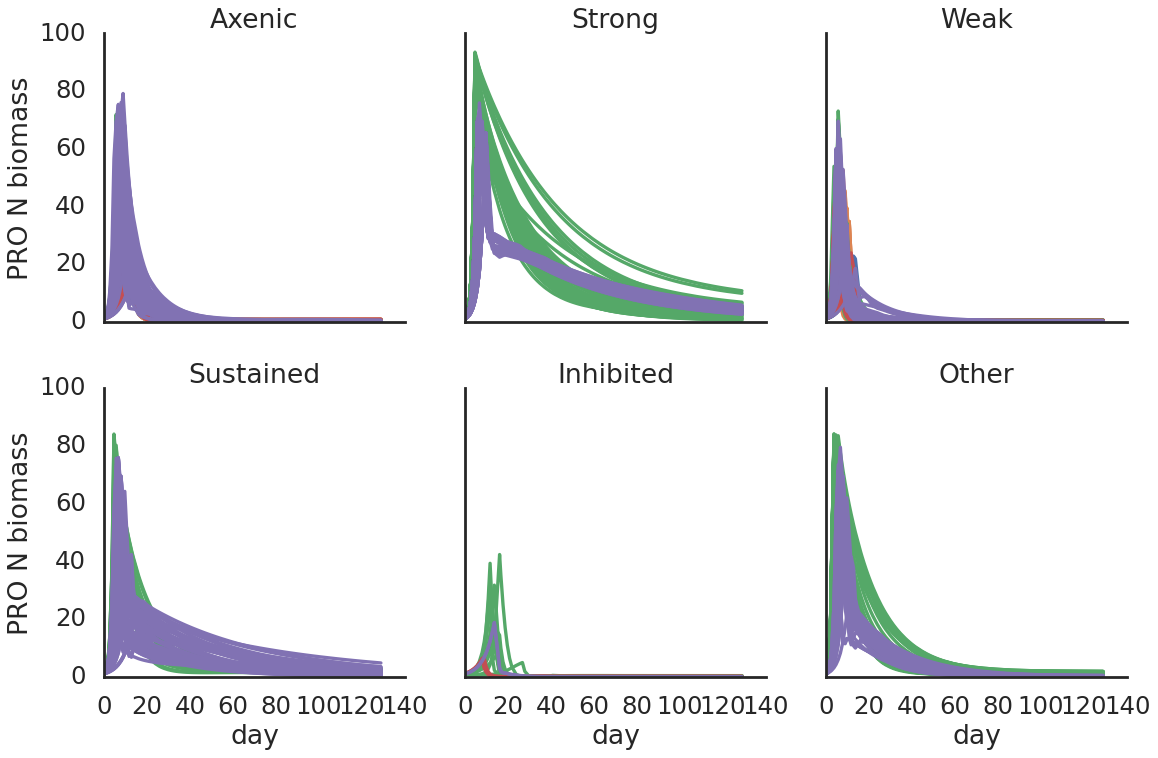

In [40]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
#    for (col_val), ax in g.axes_dict.items():
#         if col_val != 'Other':
#             sns.lineplot(
#                 data=refdf.loc[refdf['train_Group'].isin([col_val])],
#                 x='day', y='log_Nbiomass',
#             units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
#                 zorder=-1,

#                          legend=False
#                         )
    g.set(ylabel='PRO N biomass')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

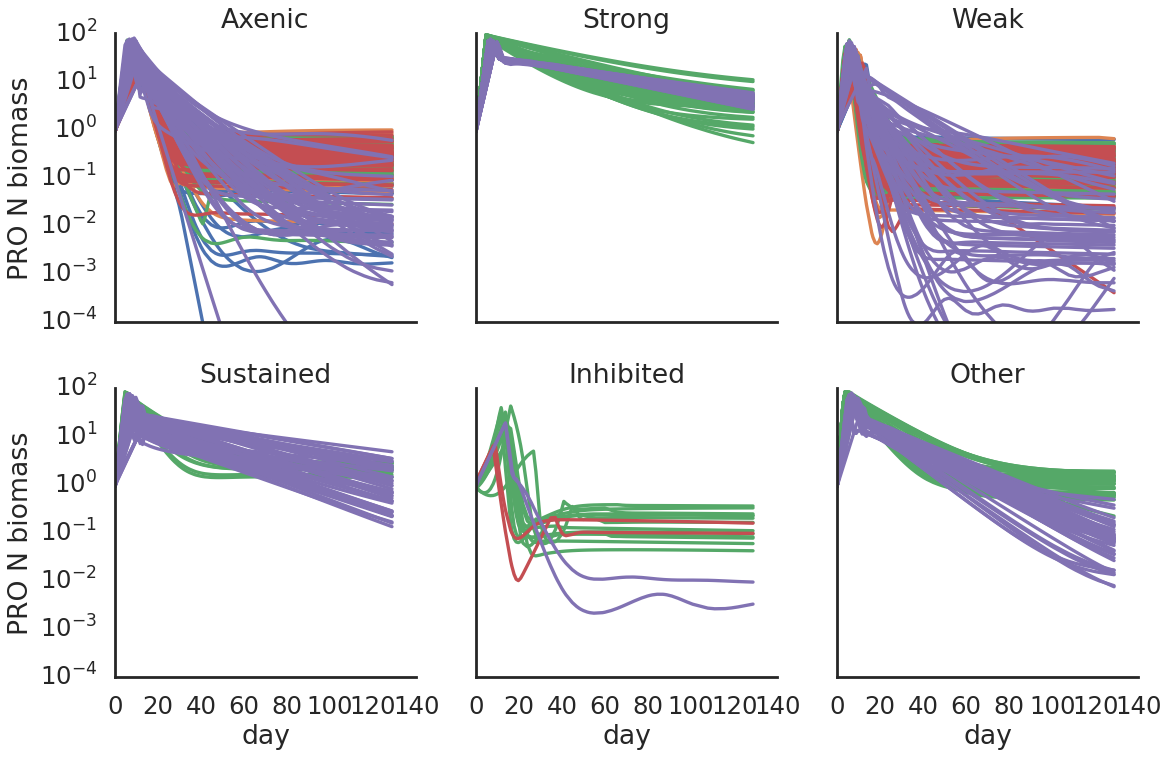

In [41]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
#    for (col_val), ax in g.axes_dict.items():
#         if col_val != 'Other':
#             sns.lineplot(
#                 data=refdf.loc[refdf['train_Group'].isin([col_val])],
#                 x='day', y='log_Nbiomass',
#             units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
#                 zorder=-1,

#                          legend=False
#                         )
    g.set(ylabel='PRO N biomass', yscale='log', ylim=(1e-4, 1e2))
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [42]:
max_sim_prob.shape

(49349,)

In [43]:
X_sim.shape, df_predicted_classes.shape

((49349, 146), (49349, 8))

In [44]:
df_predicted_classes.run_id.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [45]:
X_sim.index.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [46]:
df_sim_maxday  = X_sim[forest_features].reset_index()

In [47]:
df_sim_maxday = df_sim_maxday.melt(id_vars='run_id')
df_sim_maxday = pd.merge(df_sim_maxday, df_predicted_classes, on='run_id')
df_sim_maxday

,run_id,variable,value,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nday,5.720139,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nbiomass,48.478110,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cday,5.720139,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cbiomass,399.217701,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,std_30-60days_Nbiomass,1.286886,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...,...,...
986975,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,mean_60-80days_Cbiomass,1.000000,Weak,0.990229,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
986976,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,last_dayN,7.984028,Weak,0.990229,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
986977,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,last_dayC,10.834722,Weak,0.990229,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
986978,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,D90_dayN,4.242361,Weak,0.990229,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535


In [48]:
df_sim_maxday.columns

Index(['run_id', 'variable', 'value', 'y_pred', 'max_prob', 'idx', 'media',
       'which', 'model', 'hash'],
      dtype='object')

In [49]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

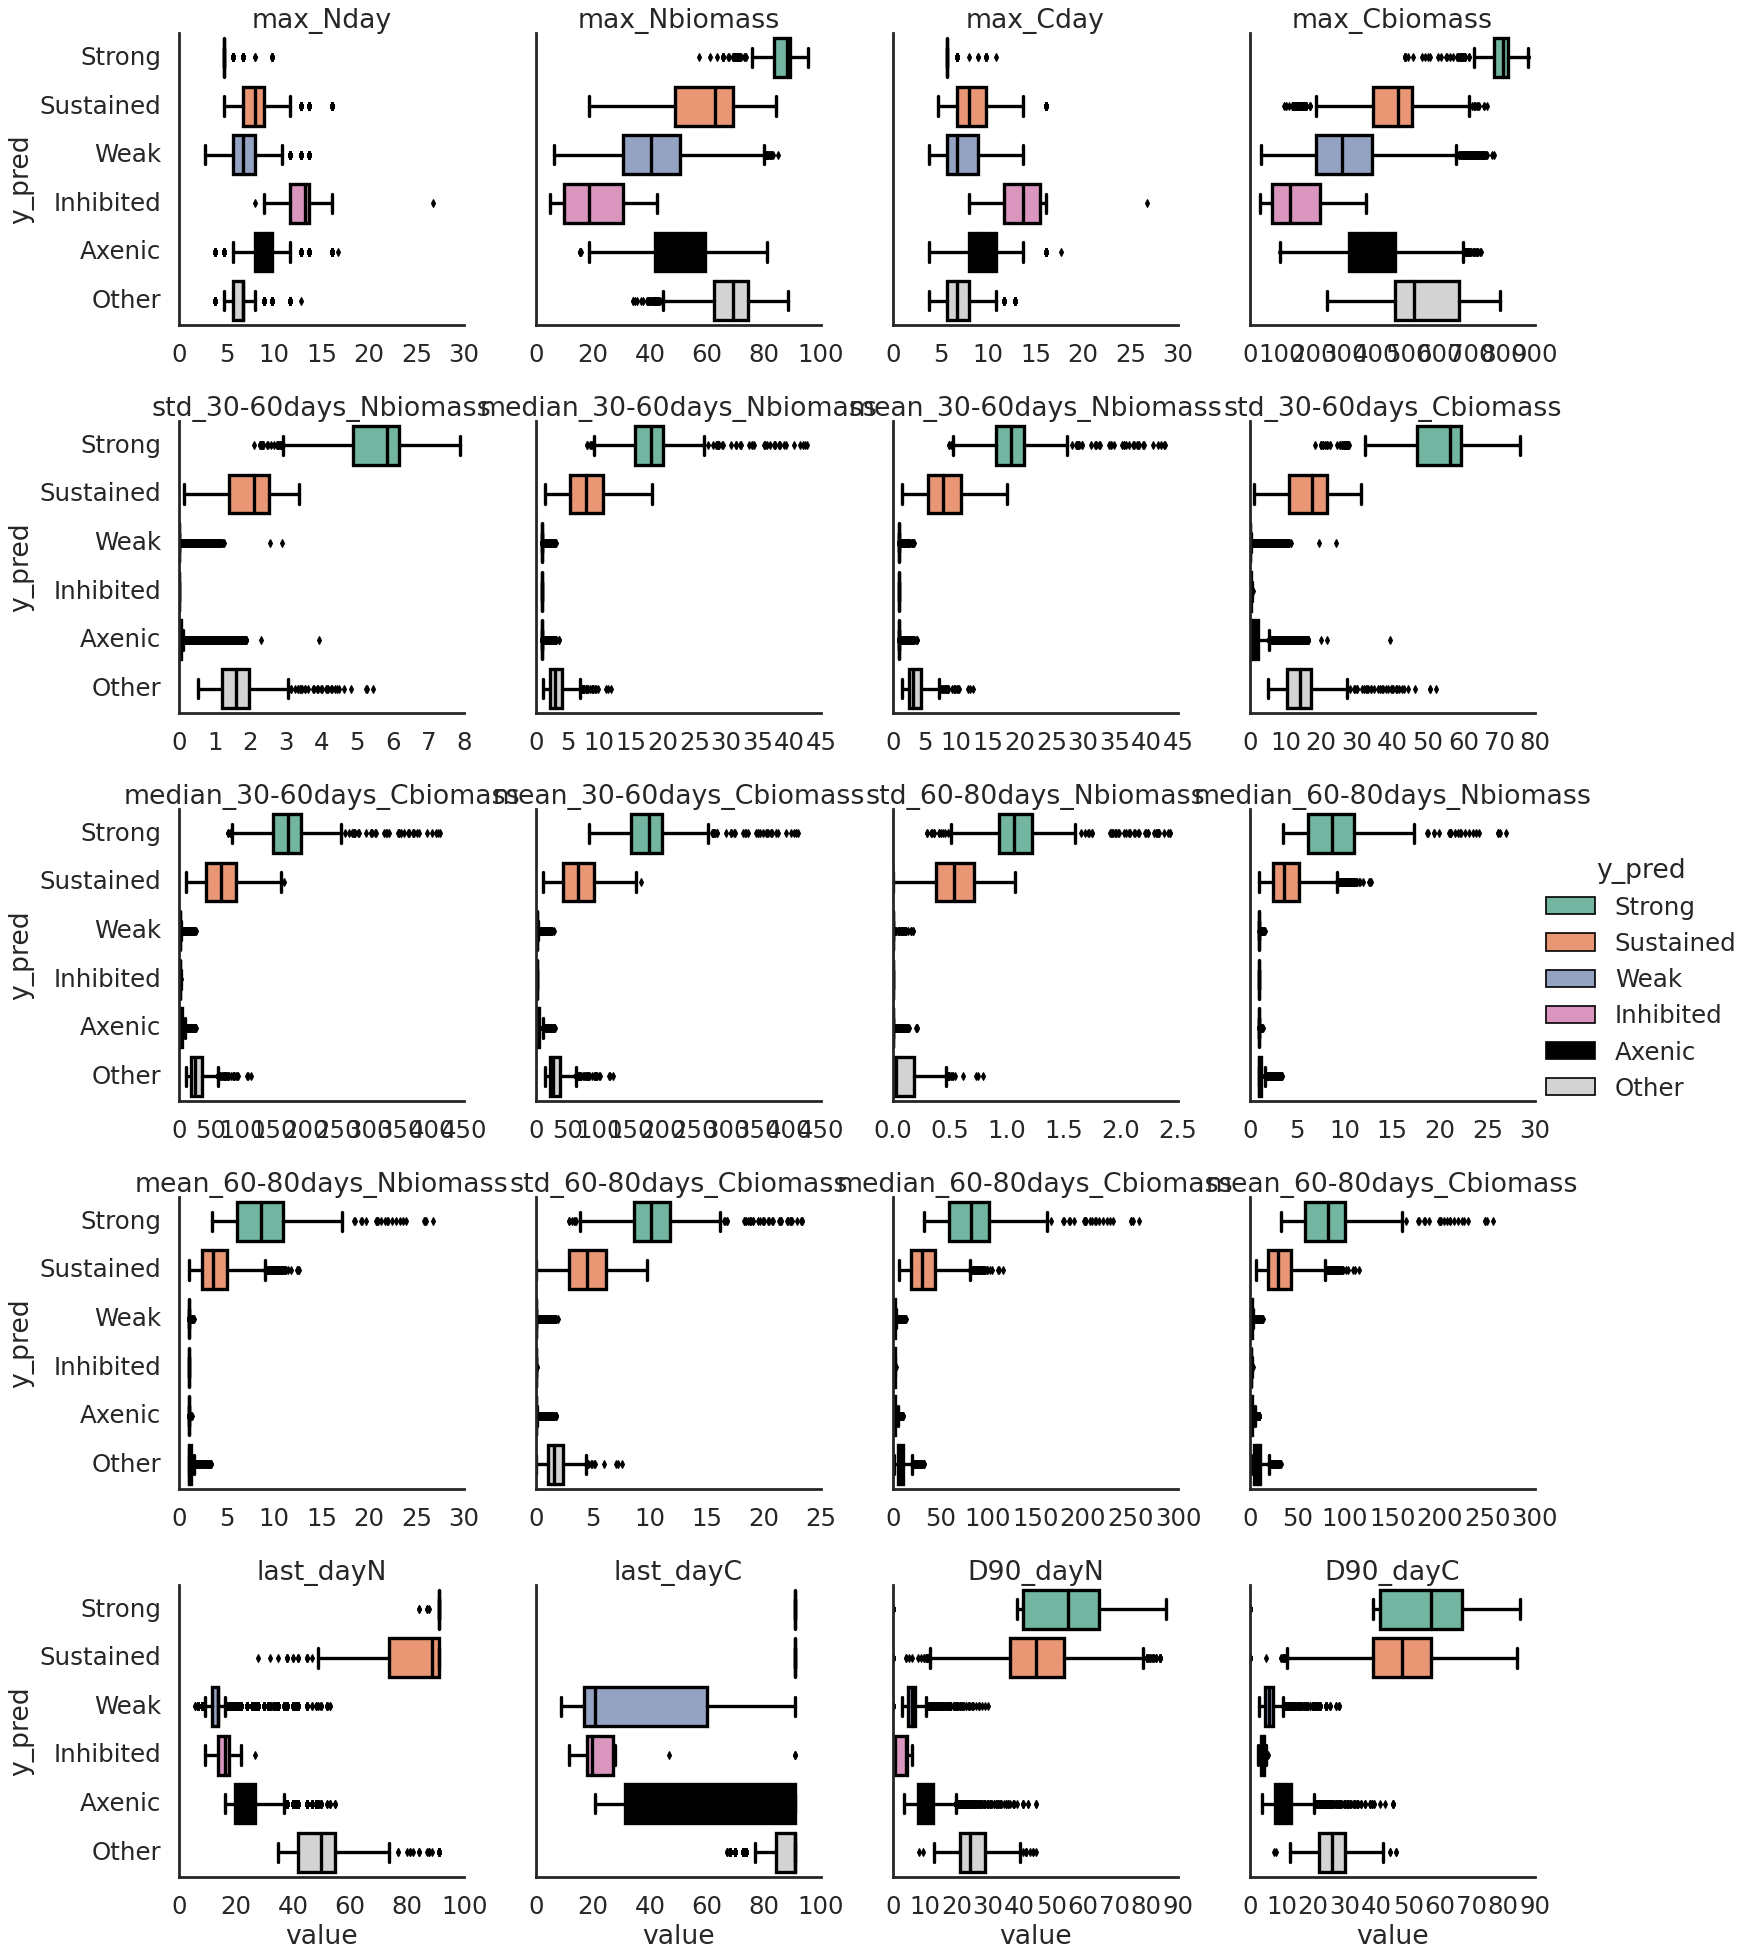

In [50]:
sns.set_context('poster')
sns.catplot(
    data=df_sim_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


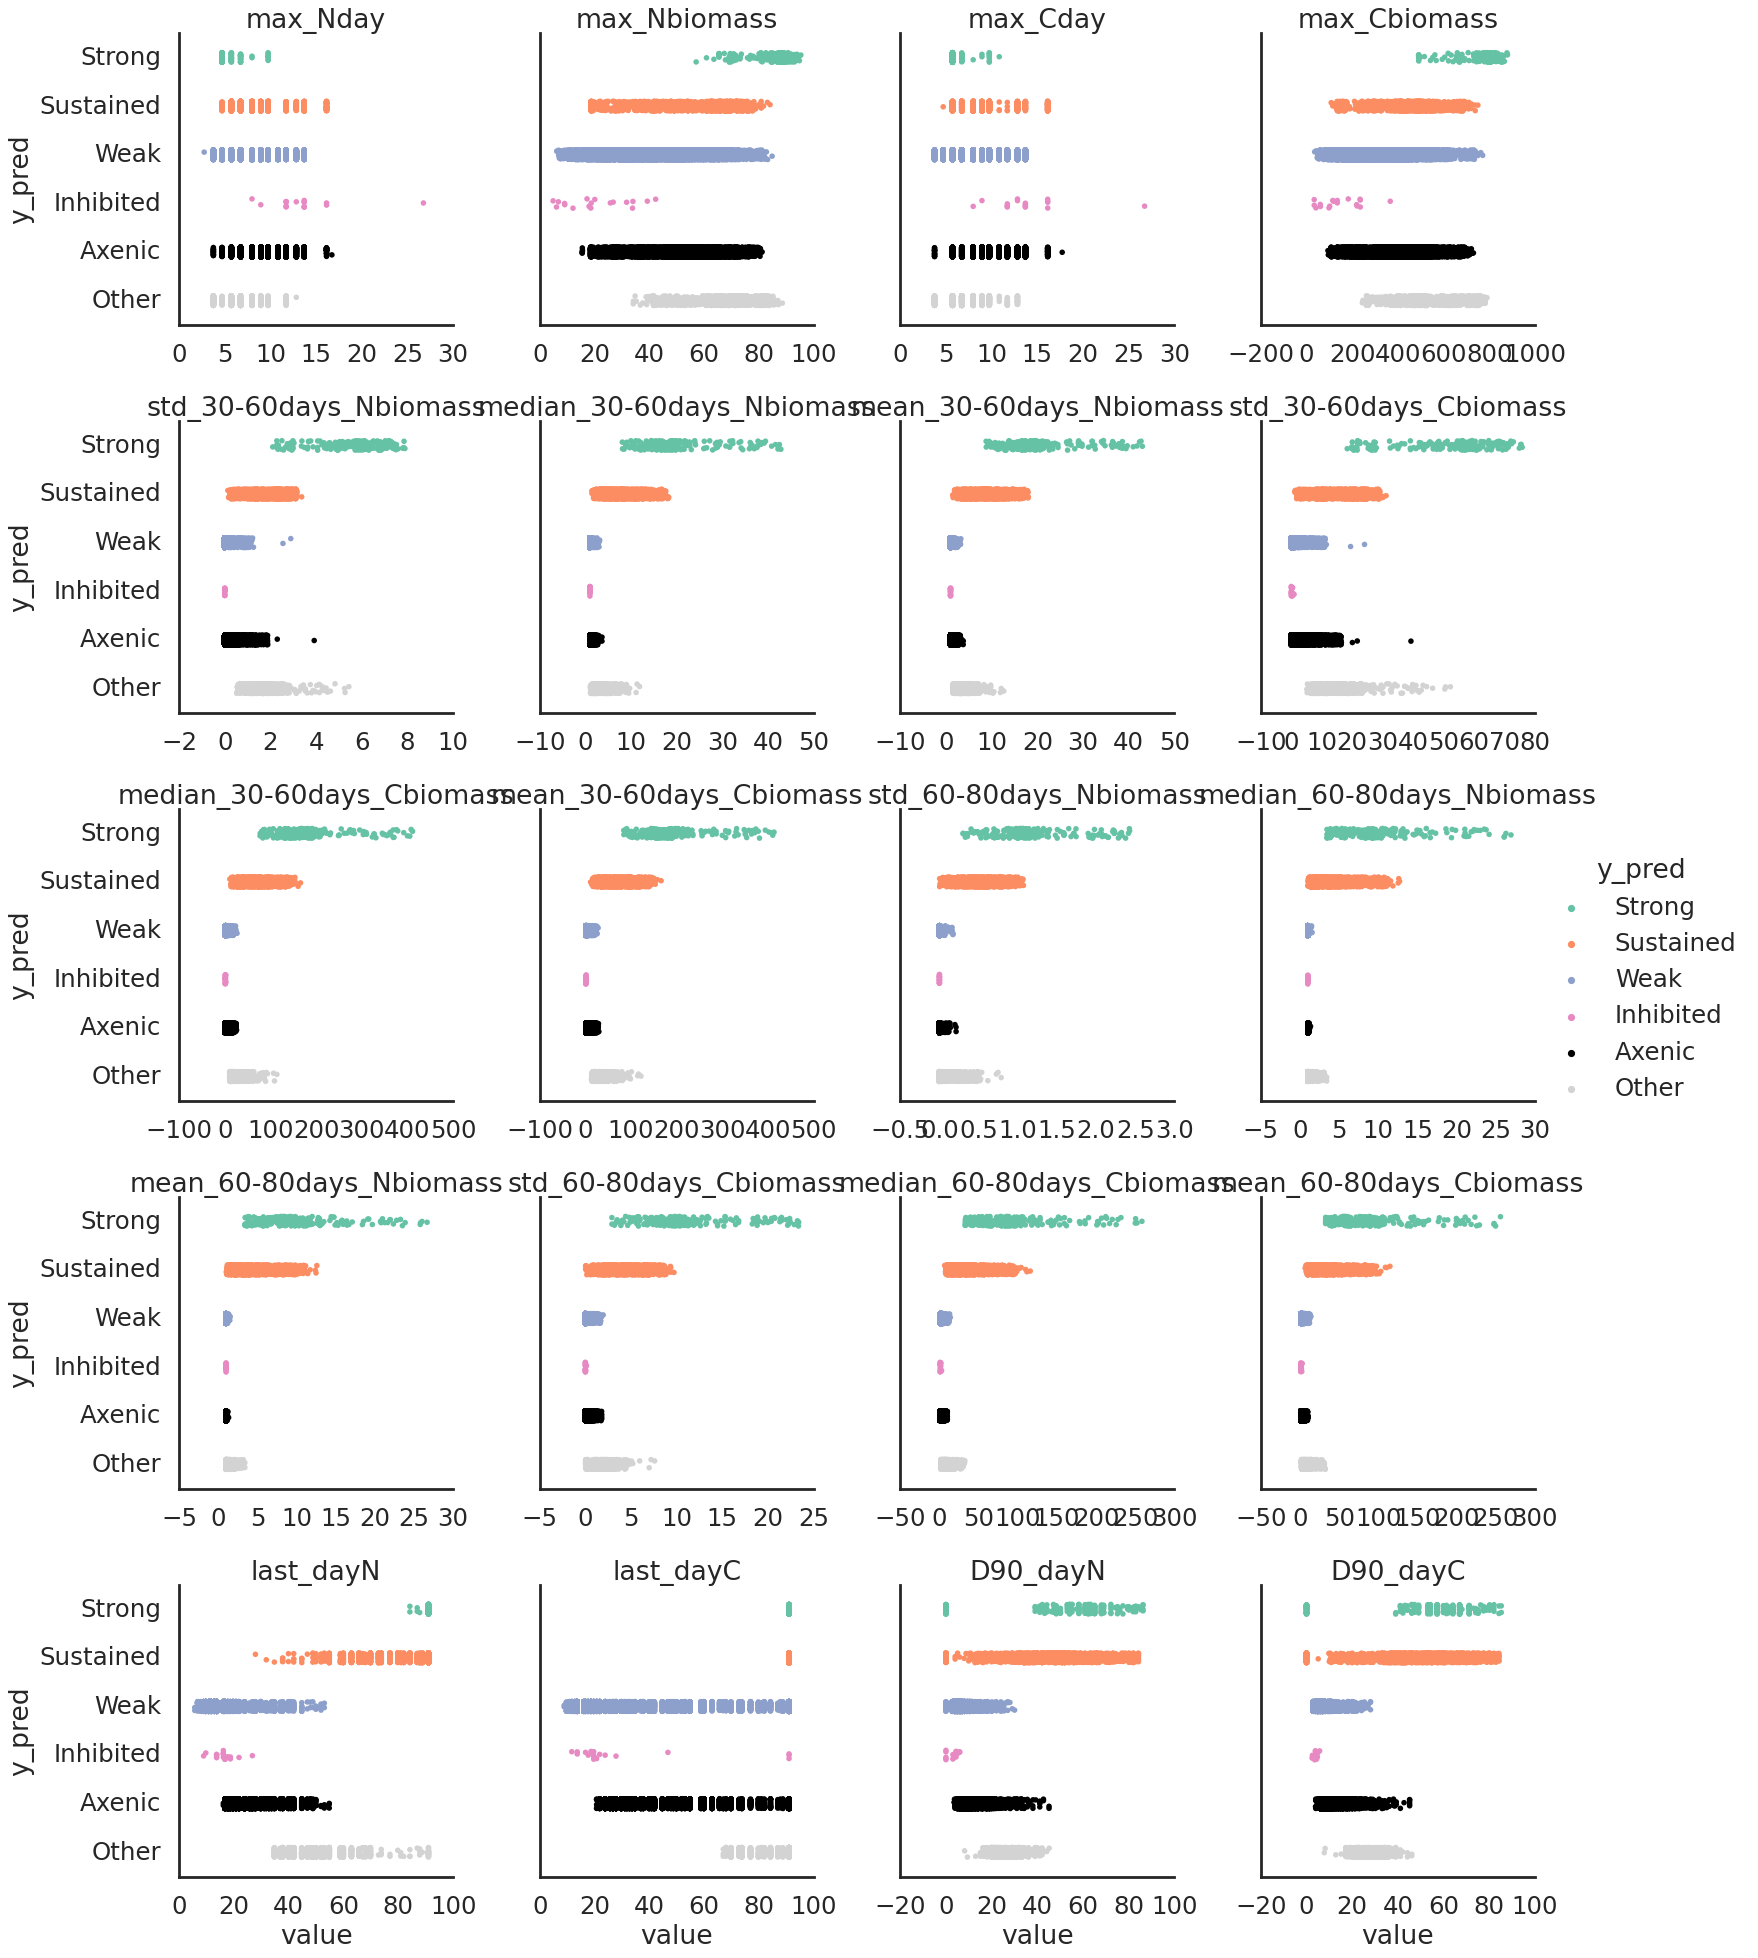

In [51]:
sns.set_context('poster')
sns.catplot(
    data=df_sim_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    #kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, #dodge=False,
).set_titles(col_template='{col_name}')


In [52]:
df_sim_maxday.loc[df_sim_maxday.variable.isin(['max_Nbiomass'])].groupby(['y_pred'])['value'].max()

y_pred
Axenic       81.167450
Inhibited    42.319560
Other        88.561315
Strong       95.306506
Sustained    84.065040
Weak         84.821596
Name: value, dtype: float64